In [43]:
import numpy as np
import pandas as pd

In [44]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
len(x_test)

10000

In [47]:
import matplotlib.pyplot as plt

In [48]:
single_image = x_train[100]

In [49]:
single_image.shape

(28, 28)

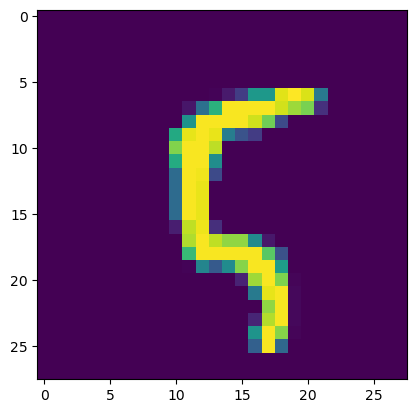

In [50]:
plt.imshow(single_image)

In [51]:
from tensorflow.keras.utils import to_categorical

In [52]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [34]:
single_image.max()

255

In [53]:
x_train = x_train/255
x_test = x_test/255

In [54]:
scaled_image = x_train[0]

In [55]:
scaled_image.max()

1.0

In [56]:
x_train = x_train.reshape(60000,28,28,1)

In [57]:
x_train.shape

(60000, 28, 28, 1)

In [58]:
x_test = x_test.reshape(10000,28,28,1)

In [59]:
from tensorflow.keras.models import Sequential


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

C:\Users\Tarique\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

In [81]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9982 - loss: 0.0063 - val_accuracy: 0.9867 - val_loss: 0.0492
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 0.9852 - val_loss: 0.0527


In [82]:
prediction = np.argmax(model.predict(x_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [83]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [84]:
import sklearn

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [80]:
print(confusion_matrix(y_test,prediction))

[[ 977    0    0    0    1    0    1    1    0    0]
 [   0 1130    1    0    0    1    2    1    0    0]
 [   2    0 1020    0    1    0    2    4    3    0]
 [   0    0    1 1007    0    0    0    0    2    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   2    1    0   11    0  876    1    0    1    0]
 [   5    3    0    0    2    1  945    0    2    0]
 [   0    0    8    0    0    0    0 1016    1    3]
 [   4    1    4    2    2    0    1    2  953    5]
 [   1    1    0    3    7    2    0    5    2  988]]
